In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

from scipy import stats

from matplotlib import pyplot as plt

In [2]:
df_train = pd.read_csv('./Participants_Data_melanoma/Train.csv')
df_train.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [3]:
df_train.isnull().any().any()

False

In [4]:
df_train.shape

(9146, 10)

In [5]:
df_train.dtypes

mass_npea         float64
size_npear        float64
malign_ratio      float64
damage_size       float64
exposed_area      float64
std_dev_malign    float64
err_malign        float64
malign_penalty      int64
damage_ratio      float64
tumor_size        float64
dtype: object

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


In [7]:
df_train.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9.146000e+03,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,9903.052174,3032.827837,0.303083,103.902118,1.372442e+06,146.304239,3992.936256,69.849661,34.461652,7.723348
std,4060.577116,1462.334147,0.062533,55.456862,5.646773e+05,70.512177,1780.672859,55.785332,5.972808,6.086852
min,2864.760000,510.530000,0.114820,10.310100,3.878534e+05,31.970400,1089.190000,0.000000,15.228000,0.000000
25%,6988.420000,1983.657500,0.259053,64.012525,9.596873e+05,95.853900,3177.682500,31.000000,30.290225,2.320000
50%,8895.965000,2684.330000,0.301055,88.458300,1.237057e+06,126.138500,3846.320000,54.000000,35.245750,5.060500
75%,12119.950000,3830.745000,0.343002,134.209000,1.693083e+06,182.251500,4664.577500,91.000000,38.806075,13.336000
max,36995.400000,13535.000000,0.525300,346.420000,4.978616e+06,528.890000,91983.700000,340.000000,46.546400,20.999000


In [8]:
z = np.abs(stats.zscore(df_train))
print(z)

[[0.73199316 0.07783041 1.88834184 ... 0.03854878 0.82048778 1.04816087]
 [1.41185873 1.26279833 0.14356616 ... 3.05025773 2.08227551 0.83386705]
 [0.11652868 0.28650821 0.81837936 ... 0.05647562 0.74765438 0.99159266]
 ...
 [0.44748602 0.96507012 1.63991123 ... 1.01913472 0.03143617 0.94509647]
 [1.11218051 2.28474787 2.22210415 ... 0.55303691 0.02123876 1.64718957]
 [0.75127472 0.99038036 1.14894319 ... 0.75023214 0.57467706 1.04816087]]


In [9]:
z.shape

(9146, 10)

In [10]:
df_train.shape

(9146, 10)

In [11]:
threshold = 3
print(np.where(z > 3))

(array([   1,    7,   74,   74,   74,   74,   81,   90,   90,   90,   90,
         90,  149,  149,  149,  149,  154,  154,  154,  165,  188,  188,
        188,  201,  208,  280,  288,  288,  288,  288,  303,  331,  331,
        347,  360,  360,  384,  416,  467,  468,  475,  475,  475,  475,
        481,  481,  483,  497,  497,  497,  513,  518,  518,  529,  529,
        529,  529,  529,  535,  535,  554,  554,  554,  557,  557,  557,
        557,  581,  581,  591,  620,  635,  635,  635,  635,  650,  730,
        730,  738,  738,  744,  773,  788,  788,  797,  800,  800,  800,
        800,  800,  800,  813,  814,  913,  915, 1014, 1014, 1050, 1059,
       1151, 1158, 1158, 1158, 1158, 1158, 1177, 1210, 1213, 1231, 1263,
       1268, 1268, 1268, 1268, 1276, 1328, 1328, 1328, 1355, 1358, 1358,
       1358, 1358, 1358, 1365, 1370, 1370, 1370, 1370, 1398, 1403, 1409,
       1409, 1409, 1409, 1411, 1411, 1446, 1449, 1454, 1457, 1457, 1461,
       1487, 1487, 1487, 1612, 1615, 1616, 1616, 1

In [12]:
df_train_o = df_train[(z < 3).all(axis=1)]
df_train_o.shape

(8744, 10)

In [13]:
df_train.shape

(9146, 10)

In [14]:
correlations = df_train_o[df_train_o.columns].corr()
correlations['tumor_size']

mass_npea         0.010961
size_npear        0.186777
malign_ratio      0.364242
damage_size      -0.150226
exposed_area      0.010937
std_dev_malign   -0.016487
err_malign        0.017824
malign_penalty    0.058239
damage_ratio      0.038393
tumor_size        1.000000
Name: tumor_size, dtype: float64

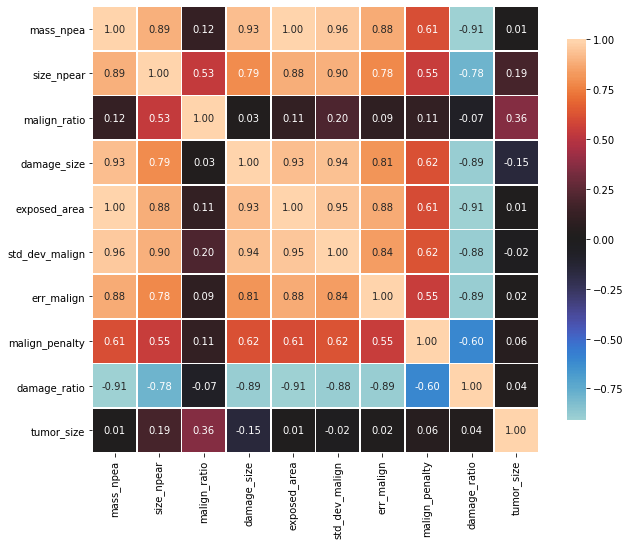

In [15]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

In [16]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

boston_df_out = df_train[~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

mass_npea           5131.530000
size_npear          1847.087500
malign_ratio           0.083950
damage_size           70.196475
exposed_area      733395.980550
std_dev_malign        86.397600
err_malign          1486.895000
malign_penalty        60.000000
damage_ratio           8.515850
tumor_size            11.016000
dtype: float64


(8329, 10)

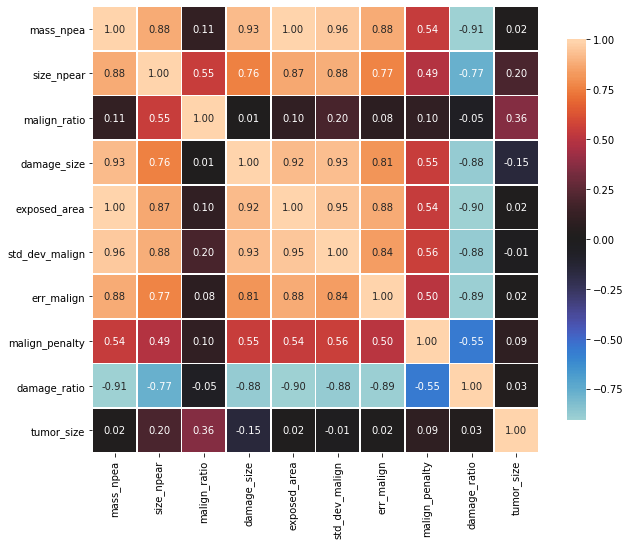

In [17]:
correlations = boston_df_out[boston_df_out.columns].corr()
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

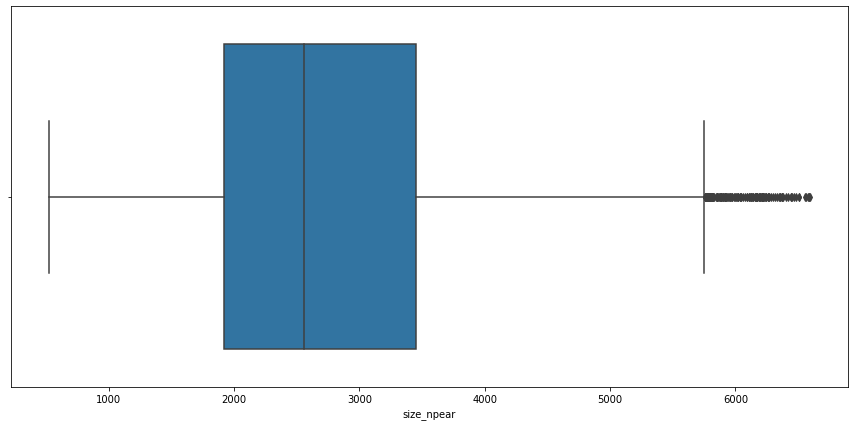

In [18]:
def plot_single_box_plot(feature_name):
    fig, ax = plt.subplots(figsize=(15,7))
    sns.boxplot(x=feature_name)
plot_single_box_plot(boston_df_out['size_npear'])

In [19]:
boston_df_out.shape

(8329, 10)

In [20]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor

from sklearn.model_selection import train_test_split

X = boston_df_out.drop('tumor_size', axis='columns')
y = boston_df_out.tumor_size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
#y_train_sc = StandardScaler().fit_transform(y_train)

X_test = MinMaxScaler().fit_transform(X_test)
#y_test_sc = StandardScaler().fit_transform(y_test)

parameters = {'nthread':[4, 8, 1], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear', 'reg:squarederror'],
              'learning_rate': [0.01, 0.03, 0.05, .07, 0.1, 0.15, 0.2], #so called `eta` value
              #'max_depth': [5, 6, 7],
              #'min_child_weight': [4],
              'subsample': [0.5, 0.7, 0.9],
              'colsample_bytree': [0.5, 0.7, 0.9],
              'n_estimators': [500, 100, 200]}
#xgb_grid = GridSearchCV(XGBRegressor(), parameters, cv = 5, n_jobs = 5, verbose=1)
#xgb_grid.fit(X_train,y_train)

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

rms = sqrt(mean_squared_error(y_test, y_pred))
print('The rmse of XGB model:test ->', rms)

y_pred_train = xgb.predict(X_train)
rms_train = sqrt(mean_squared_error(y_train, y_pred_train))
print('The rmse of XGB model:train ->', rms_train)

The rmse of XGB model:test -> 4.26210918715717
The rmse of XGB model:train -> 1.9729377671504063


In [22]:
# Linear regression

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)

rms = sqrt(mean_squared_error(y_test, y_pred))
print('The rmse of LinearReg model:test ->', rms)


y_pred_train = lreg.predict(X_train)
rms_train = sqrt(mean_squared_error(y_train, y_pred_train))
print('The rmse of LinearReg model:train ->', rms_train)

The rmse of LinearReg model:test -> 5.102451537380341
The rmse of LinearReg model:train -> 5.030173375376967


In [23]:
# Support vector machine

from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

rms = sqrt(mean_squared_error(y_test, y_pred))
print('The rmse of Support vector Regressor model:test ->', rms)

y_pred_train = svr.predict(X_train)
rms_train = sqrt(mean_squared_error(y_train, y_pred_train))
print('The rmse of Support vector Regressor model:train ->', rms_train)

The rmse of Support vector Regressor model:test -> 4.923229768646532
The rmse of Support vector Regressor model:train -> 4.887518000698464


In [24]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

rms = sqrt(mean_squared_error(y_test, y_pred))
print('The rmse of Random forest Regressor model:test ->', rms)

y_pred_train = rfr.predict(X_train)
rms_train = sqrt(mean_squared_error(y_train, y_pred_train))
print('The rmse of Random forest Regressor model:train ->', rms_train)

The rmse of Random forest Regressor model:test -> 4.097421511145299
The rmse of Random forest Regressor model:train -> 1.4942481854537601


In [30]:

# SVR perfromed well here.
    # Saving it to file.
    
import pickle as pkl

saved_model_file_name = 'MelonomaPredictor.pkl'
pkl.dump(svr, open(saved_model_file_name, 'wb'))

loaded_model = pkl.load(open(saved_model_file_name, 'rb'))
loaded_model.predict(X_test)

array([ 4.11022403, 13.24755251, 14.79692434, ...,  7.78093462,
       10.22292828,  6.38407228])

In [31]:
df_test = pd.read_csv('./Participants_Data_melanoma/Test.csv')
df_test.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,4946.44,914.06,0.18479,54.5566,6.628345e+05,67.0525,2301.76,22,41.9554
1,5613.85,1629.12,0.29019,51.5524,7.842271e+05,80.1986,3235.00,48,40.7410
2,12421.10,3062.41,0.24654,154.1560,1.763575e+06,186.8590,4684.63,63,29.4778
3,6830.77,2457.66,0.35979,56.8995,9.296623e+05,92.7361,3211.93,42,38.5027
4,33407.80,12353.60,0.36978,219.0740,4.595871e+06,493.3370,13389.36,187,26.8449


In [32]:
df_test = MinMaxScaler().fit_transform(df_test)
df_test[0]

array([0.06785857, 0.03424624, 0.19021414, 0.12132318, 0.06663616,
       0.06045025, 0.02172534, 0.06285714, 0.66626739])

In [34]:
y_pred_sub = loaded_model.predict(df_test)
y_pred_sub

array([5.36388286, 8.18677079, 8.54445723, ..., 8.6130227 , 6.21077153,
       3.85713535])

In [39]:
df_sub = pd.DataFrame({'tumor_size': y_pred_sub})
df_sub.to_csv('sub_df.csv', index=False)